You've seen vectors as matrices, but now we're going to look at vectors from a totally different perspective; geometrically! I promise this one will have more pictures than $LA2$. In fact this should be a ton of fun!

Let's get going! You can ignore this code implementation if you would like.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

In [6]:
def plot2D(segments, points, scale, color):
    negx, posx, negy, posy, frqncy = scale[0], scale[1], scale[0], scale[1] , 2
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set(xlim=(negx-1, posx+1), ylim=(negy-1, posy+1), aspect='equal')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    x_ticks = np.arange(negx, posx+1, frqncy)
    y_ticks = np.arange(negy, posy+1, frqncy)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    ax.set_xticks(np.arange(negx, posx+1), minor=True)
    ax.set_yticks(np.arange(negy, posy+1), minor=True)
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    ax.plot((-0), (0), marker='<', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (-0), marker='v', transform=ax.get_xaxis_transform(), **arrow_fmt)
    ax.set_facecolor(color)
    for ell in segments:
        #ax.plot(ell[0], ell[1], alpha=0.5, color=ell[2])
        ax.plot([ell[0][0],ell[1][0]],[ell[0][1],ell[1][1]], marker = 'o', color='gray', linestyle='--')
    for point in points:
        ax.quiver(point[0][0],point[0][1], color=point[1], angles='xy', scale_units='xy', scale=1)

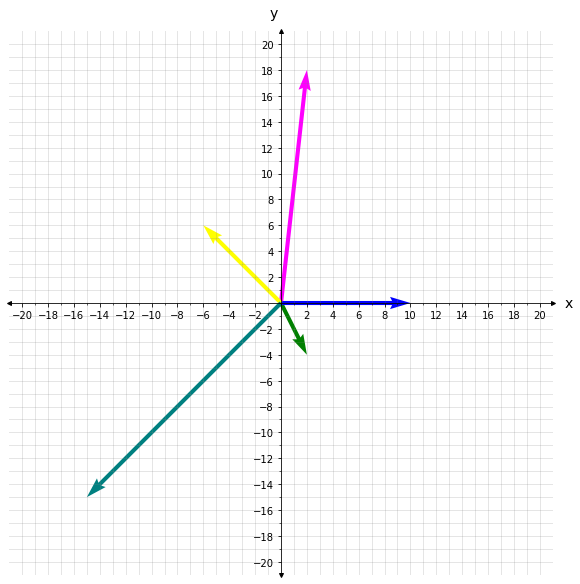

In [7]:
v1 = np.array([2,-4])
v2 = np.array([2,18])
v3 = np.array([10,0])
v4 = np.array([-6,6])
v5 = np.array([-15,-15])

plot2D([],
       [(v1,'green'), (v2,'magenta'), (v3,'blue'), (v4,'yellow'), (v5,'teal')],
       [-20,20], 'white')

Here are the first few vectors we will start with, all different colors and shiny!

$$ \color{green}{v_{1}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}\hphantom{abcedf}\color{magenta}{v_{2}}=\begin{pmatrix}
2\\
18
\end{pmatrix}\hphantom{abcedf}\color{blue}{v_{3}}=\begin{pmatrix}
10\\
0
\end{pmatrix}\hphantom{abcedf}\color{yellow}{v_{4}}=\begin{pmatrix}
-6\\
6
\end{pmatrix}\hphantom{abcedf}\color{teal}{v_{5}}=\begin{pmatrix}
-15\\
-15
\end{pmatrix}$$

All of the vectors above include $2$ components. Keeping in line with lesson 2 we could assign them a size of $1\times 2$ or $2\times 1$, but that will be more appropriate when we start multiplying them. For now, since we need to pick one, let's just assume $v_{2},v_{3}\in \mathbb{R}^{2\times 1}$ as shown above.

To further simplify this entry point let's isolate $\color{magenta}{v_{2}}$ and $\color{blue}{v_{3}}$. We can add them together of course because of our matrix rules:

$$\color{orange}{v_{6}}=\color{magenta}{v_{2}}+\color{blue}{v_{3}}=\begin{pmatrix}
2\\
18
\end{pmatrix}+\begin{pmatrix}
10\\
0
\end{pmatrix}=\begin{pmatrix}
12\\
18
\end{pmatrix}$$

Let's plot all three, $\color{magenta}{v_{2}}$, $\color{blue}{v_{3}}$, and their sum resultant $\color{orange}{v_{6}}$.

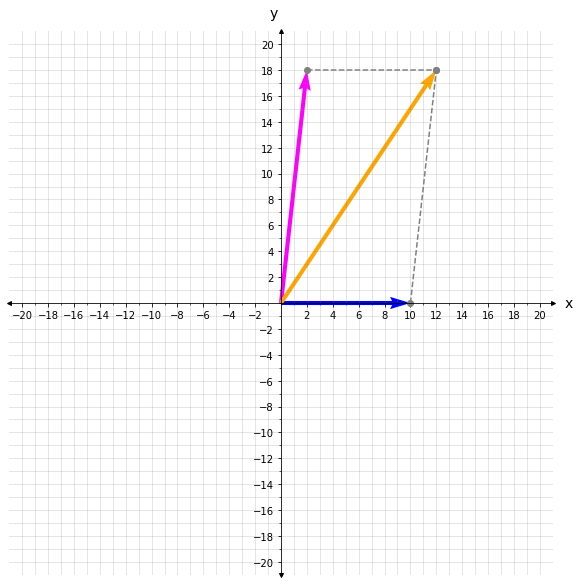

In [8]:
v6 = v2+v3
plot2D([(v2,v6),(v3,v6)],
       [(v2,'magenta'), (v3,'blue'), (v6,'orange')],
       [-20,20], 'white')

Notice the parallelogram created by $\color{magenta}{v_{2}}$, $\color{blue}{v_{3}}$, and $\color{orange}{v_{6}}=(\color{magenta}{v_{2}}+\color{blue}{v_{3}})$. The gray dashed lines as line segments from the end of the original vectors to the tip of the resultant complete the rectangle. This is the $\textbf{parallelogram law}$.

Let's do one more to hammer it home. Take $\color{orange}{v_{6}}=(\color{magenta}{v_{2}}+\color{blue}{v_{3}})$ and add it to $\color{teal}{v_{5}}$:

$$\color{purple}{v_{7}}=\color{orange}{v_{6}}+\color{teal}{v_{5}}=(\color{magenta}{v_{2}}+\color{blue}{v_{3}})+\color{teal}{v_{5}}=\begin{pmatrix}
12\\
18
\end{pmatrix}+\begin{pmatrix}
-15\\
-15
\end{pmatrix}=\begin{pmatrix}
-3\\
3
\end{pmatrix}$$

Notice:

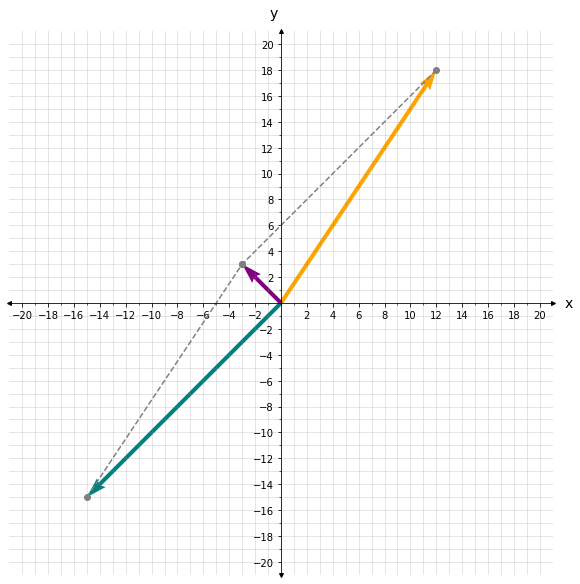

In [9]:
v7 = v6+v5

plot2D([(v6,v7),(v5,v7)],
       [(v6,'orange'), (v5,'teal'), (v7,'purple')],
       [-20,20], 'white')

In the above model, the vector looks like the resultant of $\color{orange}{v_{6}}$ and $\color{teal}{v_{5}}$. Of course it does because it is. However it is also the resultant of $\color{magenta}{v_{2}}$, $\color{blue}{v_{3}}$, and $\color{teal}{v_{5}}$ because both $\color{magenta}{v_{2}}$ and $\color{blue}{v_{3}}$ underlie $\color{orange}{v_{6}}$. We can show that as well:

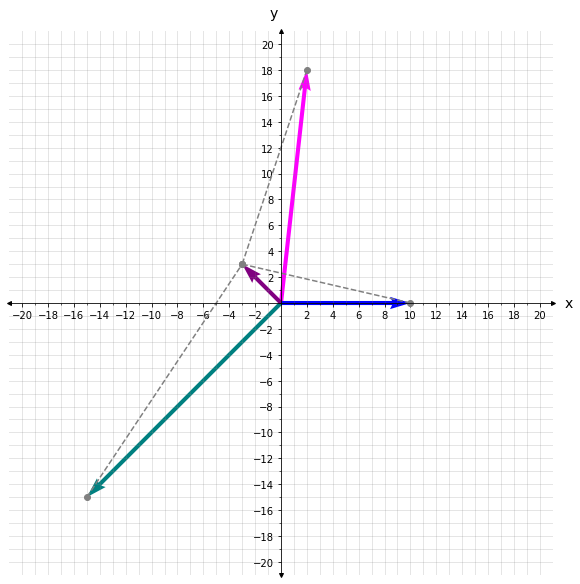

In [10]:
plot2D([(v2,v7),(v3,v7), (v5,v7)],
       [(v2,'magenta'), (v3, 'blue'), (v5,'teal'), (v7,'purple')],
       [-20,20], 'white')

This new vector has a shorter length than all of its parent vectors. That has to do with the directions and $\textbf{magnitudes}$ of the vectors that make up it...oh that's right! We need to talk about length! Well magnitude is just a fancy word for length so just think of it as length. We will get to it more formally in a second. Hold on though. Let's stretch $\color{purple}{v_{7}}$. We could also shrink it I guess, but we let's see it get bigger. This is $\textbf{scaling}$. Let's scale by $5$:

$$\color{coral}{v_{8}}=5\color{purple}{v_{7}}=5\big(\color{orange}{v_{6}}+\color{teal}{v_{5}}\big)=5\big((\color{magenta}{v_{2}}+\color{blue}{v_{3}})+\color{teal}{v_{5}}\big)=5\big(\begin{pmatrix}
12\\
18
\end{pmatrix}+\begin{pmatrix}
-15\\
-15
\end{pmatrix}\big)=5\begin{pmatrix}
-3\\
3
\end{pmatrix}=\begin{pmatrix}
-15\\
15
\end{pmatrix}$$

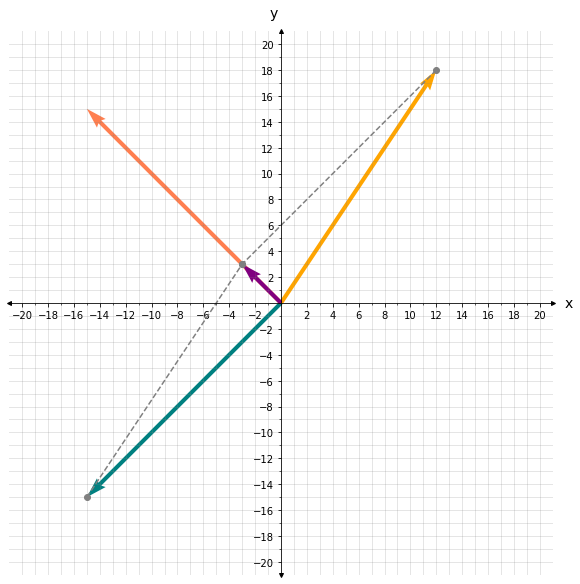

In [11]:
v8 = 5*v7

plot2D([(v6,v7),(v5,v7)],
       [(v6,'orange'),(v5,'teal'), (v8,'coral'), (v7, 'purple')],
       [-20,20], 'white')

Notice that $\color{coral}{v_{8}}$ is a scaled version of our resultant vector $\color{purple}{v_{7}}$, but it is not a direct sum of the two vectors that create $\color{purple}{v_{7}}$. It $\textit{is}$ a linear combination of those vectors where each is scaled by $5$ which should make sense though they clearly run far off the map:

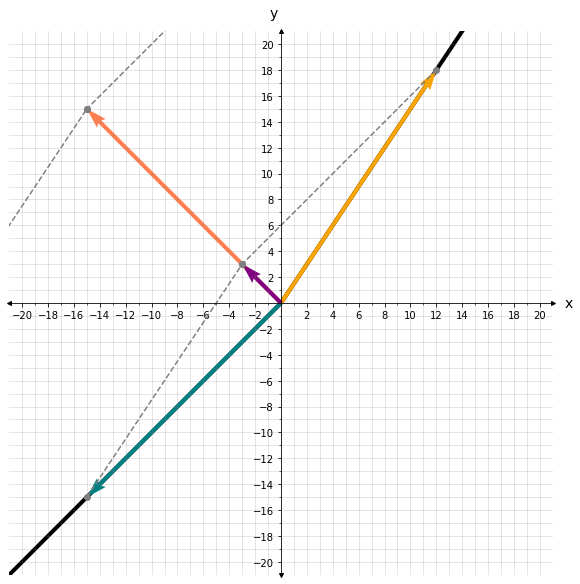

In [12]:
plot2D([(5*v6,v8),(5*v5,v8),(v6,v7),(v5,v7)],
       [(5*v6,'black'),(5*v5,'black'),(v6,'orange'),(v5,'teal'), (v8,'coral'), (v7, 'purple')],
       [-20,20], 'white')

Here, let me explain with a different example.

What happens if we add multiple vectors? What about all five original vectors?

$$\color{maroon}{v_{9}}=\color{green}{v_{1}}+\color{pink}{v_{2}}+\color{blue}{v_{3}}+\color{yellow}{v_{4}}+\color{teal}{v_{5}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}+\begin{pmatrix}
2\\
18
\end{pmatrix}+\begin{pmatrix}
10\\
0
\end{pmatrix}+\begin{pmatrix}
-6\\
6
\end{pmatrix}+\begin{pmatrix}
-15\\
-15
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

Let's see the resultant as the sum of all five:

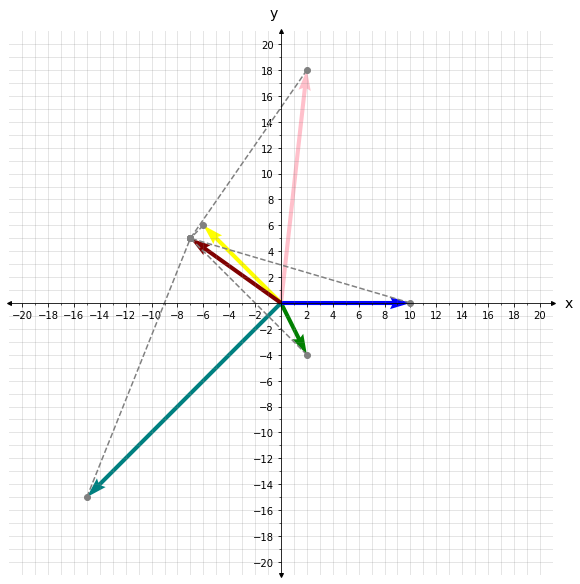

In [13]:
v9 = (v1+v2+v3+v4+v5)

plot2D([(v1,v9), (v2,v9), (v3,v9), (v4,v9), (v5,v9)],
       [(v1,'green'), (v2,'pink'), (v3,'blue'), (v4,'yellow'), (v5,'teal'), (v9, 'maroon')],
       [-20,20], 'white')

Now, what if we scale it by $-\frac{3}{2}$? Let's map that in black:

$$\color{black}v_{10}=-\frac{3}{2}\color{maroon}{v_{9}}=-\frac{3}{2}\big(\color{green}{v_{1}}+\color{pink}{v_{2}}+\color{blue}{v_{3}}+\color{yellow}{v_{4}}+\color{teal}{v_{5}}\big)=-\frac{3}{2}\big(\begin{pmatrix}
2\\
-4
\end{pmatrix}+\begin{pmatrix}
2\\
18
\end{pmatrix}+\begin{pmatrix}
10\\
0
\end{pmatrix}+\begin{pmatrix}
-6\\
6
\end{pmatrix}+\begin{pmatrix}
-15\\
-15
\end{pmatrix}\big)=-\frac{3}{2}\begin{pmatrix}
-7\\
5
\end{pmatrix}=\begin{pmatrix}
\frac{21}{2}\\
-\frac{15}{2}
\end{pmatrix}$$

Notice that all our original vectors still add to $\color{maroon}{v_{9}}$, but the scaling produces a new vector, $\color{black}{v_{10}}$.

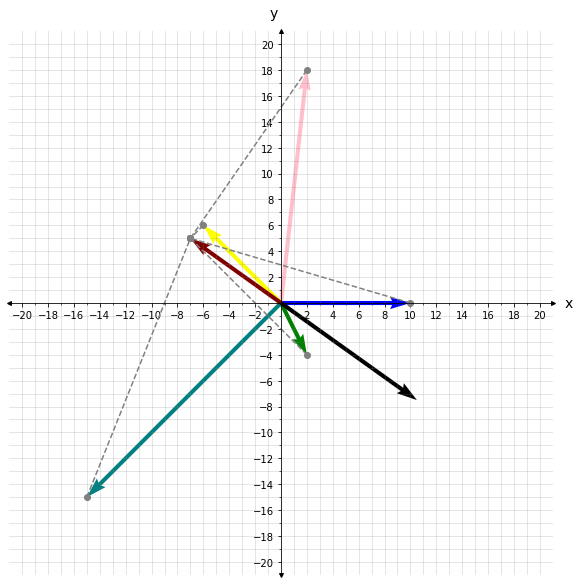

In [14]:
v10=-(3/2)*v9

plot2D([(v1,v9), (v2,v9), (v3,v9), (v4,v9), (v5,v9)],
       [(v1,'green'), (v2,'pink'), (v3,'blue'), (v4,'yellow'), (v5,'teal'), (v9, 'maroon'), (v10,'black')],
       [-20,20], 'white')

Now, distributing the $-\frac{3}{2}$ into this will scale the vectors like so:

$$
\color{green}{-\frac{3}{2}v_{1}}+\color{pink}{-\frac{3}{2}v_{2}}+\color{blue}{-\frac{3}{2}v_{3}}+\color{yellow}{-\frac{3}{2}v_{4}}+\color{teal}{-\frac{3}{2}v_{5}}=\begin{pmatrix}
-3\\
6
\end{pmatrix}+\begin{pmatrix}
-3\\
-27
\end{pmatrix}+\begin{pmatrix}
-15\\
0
\end{pmatrix}+\begin{pmatrix}
9\\
-9
\end{pmatrix}+\begin{pmatrix}
\frac{45}{2}\\
\frac{45}{2}
\end{pmatrix}=\begin{pmatrix}
\frac{21}{2}\\
-\frac{15}{2}
\end{pmatrix}$$

Let's plot it this way where the vectors are their scaled versions instead:

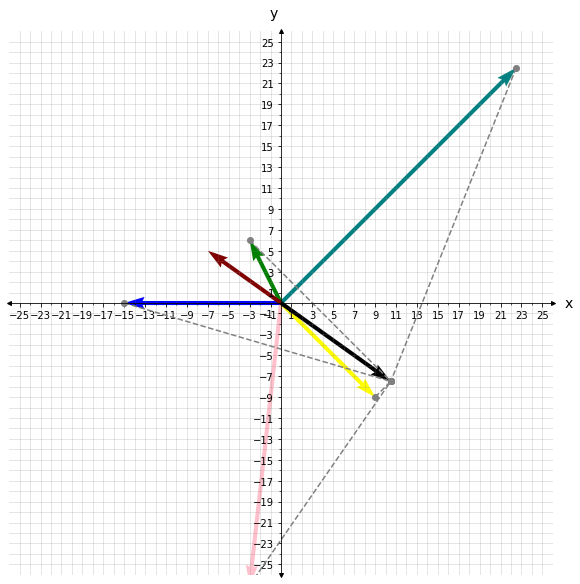

In [15]:
v11 = -(3/2)*v1-(3/2)*v2-(3/2)*v3-(3/2)*v4-(3/2)*v5

plot2D([(-(3/2)*v1,v11), (-(3/2)*v2,v11), (-(3/2)*v3,v11), (-(3/2)*v4,v11), (-(3/2)*v5,v11)],
       [(-(3/2)*v1,'green'), (-(3/2)*v2,'pink'), (-(3/2)*v3,'blue'), (-(3/2)*v4,'yellow'), (-(3/2)*v5,'teal'), (v9,'maroon'), (v11,'black')],
       [-25,25], 'white')

The scaled version of $\color{black}{v_{10}}$ is vector the sum of $\color{green}{-\frac{3}{2}v_{1}}+\color{pink}{-\frac{3}{2}v_{2}}+\color{blue}{-\frac{3}{2}v_{3}}+\color{yellow}{-\frac{3}{2}v_{4}}+\color{teal}{-\frac{3}{2}v_{5}}$. We get the same result if we add the original vectors first and then scale.

This is all well and good, but it begs another type of question; two in fact. Let's take on the first! I promised some talk about magnitude/length.

So, all vectors can be scaled, meaning they can be made shorter or longer. That's fairly obvious at this point, but what is length?!?

Philosophical consequences aside, do you remember Pythagoras from high school?

$$ a^{2}+b^{2}=c^{2}$$

You might remember this has something to do with right triangles. Well you'd be absolutely correct! Let's only use our resultant vector $\color{black}{v_{10}}$ from above, and try to find it's length. Remember our friend the $\textbf{linear combination}$? We will use it to extract two extremely important vectors from $\color{black}{v_{10}}$. Notice:

$$v_{10}=\begin{pmatrix}
\frac{21}{2}\\
-\frac{15}{2}
\end{pmatrix}=\begin{pmatrix}
\frac{21}{2}\\
0
\end{pmatrix}+\begin{pmatrix}
0\\
-\frac{15}{2}
\end{pmatrix}=(\frac{21}{2})\begin{pmatrix}
1\\
0
\end{pmatrix}+(-\frac{15}{2})\begin{pmatrix}
0\\
1
\end{pmatrix}=(\frac{21}{2})\color{red}{e_{1}}+(-\frac{15}{2})\color{red}{e_{2}}$$

It's $\color{red}{e_{1}}$ and $\color{red}{e_{2}}$! Say hello once again to our $\textbf{standard unit vectors}$. I believe I promised we would dig a little deeper into these right? Well let's plot them too along with their scaled versions by $\frac{21}{2}$ and $-\frac{15}{2}$ respectively:

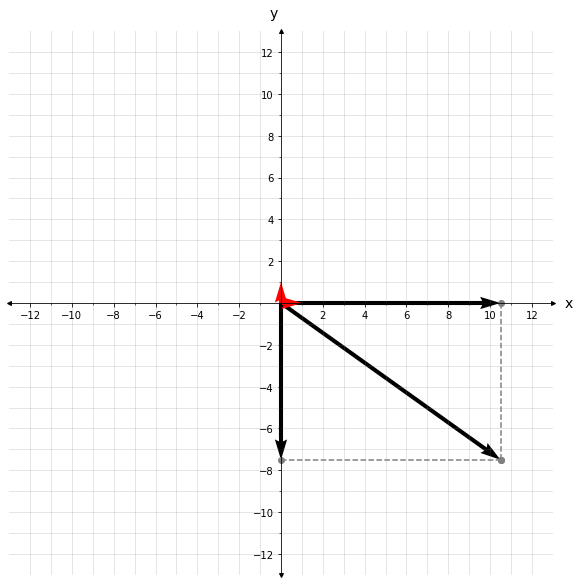

In [16]:
e1 = np.array([1,0])
e2 = np.array([0,1])

plot2D([((21/2)*e1,v10), (-(15/2)*e2,v10)],
       [((21/2)*e1,'black'), (-(15/2)*e2,'black'), (v10,'black'), (e1,'red'), (e2,'red')],
       [-12,12], 'white')

So, other than the identity matrix and the super cool properities to isolate vectors from a matrix, these $\text{standard unit vectors}$ have another super power. First up though, why the name? Well they are:

$\hphantom{abcdefghijk}\bullet \text{vectors}$

$\hphantom{abcdefghijk}\bullet \text{unital}$

$\hphantom{abcdefghijk}\bullet \text{standardized}$

Okay. What does this mean? Well they're vectors. We already know the definition of a vector.

They're $\textbf{untial}$. All this means is that we think of their length as the basic unit of measure in that direction. So we think of the length of $\color{red}{e_{j}}$ as $1$ regardless of which $j\in \mathbb{N}$ is involved.

Finally, they're standardized, meaning they're pretty canonically thought of as $\textit{the}$ unital vectors. There are infinite vectors of length $1$. Think of all the ones that make up the unit circle for example. We use $\textit{these}$ specific unital vectors because they coordinate nicely with the axes we define. Consequently this means all of their components are $0$ except for a single $1$.

Now before I just hand you a formula for length, you should know there are some hidden triganometric consequences that will get teased out later. In higher level math courses there are also different ways to define length. For our purpose though:

$$||\color{red}{e_{1}}||=1\hphantom{abcdefg}||\color{red}{e_{2}}||=1$$

If we scale these by $\frac{21}{2}$ and $-\frac{15}{2}$ respectively to the lengths of the components of $\color{black}{v_{10}}$ we see:

$$\frac{21}{2}||\color{red}{e_{1}}||=\frac{21}{2}\hphantom{abcdefg}-\frac{15}{2}||\color{red}{e_{2}}||=-\frac{15}{2}$$

Notice that the scaled versions of $\color{red}{e_{1}}$ and $\color{red}{e_{2}}$ make up the base and height of the right triangle with $\color{black}{v_{10}}$ as its hypotenuse. Just plug it into Pythagoras:

$$(\frac{21}{2}||\color{red}{e_{1}}||)^{2}+(-\frac{15}{2}||\color{red}{e_{2}}||)^{2}=(||\color{black}{v_{10}}||)^{2} $$

Since $||\color{red}{e_{1}}||=1=||\color{red}{e_{2}}||$:

$$||\color{black}{v_{10}}||^{2}=(\frac{21}{2})^{2}+(-\frac{15}{2})^{2} $$

$$||\color{black}{v_{10}}||=\sqrt{(\frac{21}{2})^{2}+(-\frac{15}{2})^{2}}=\sqrt{(\frac{3}{2})^{2}(7^{2}+(-5)^{2})}=\frac{3}{2}\sqrt{(-7)^{2}+(5)^{2}}=\frac{3}{2}||\color{maroon}{v_{9}}||$$

Wait? Where did $\color{maroon}{v_{9}}$ come from? Well remember...we scaled $\color{maroon}{v_{9}}$ by $-\frac{3}{2}$ to get $\color{black}{v_{10}}$. Notice that it spit out $|-\frac{3}{2}|=\frac{3}{2}$ as the length scalar though. This should make sense algebraically because you just did it and spiritually because length is always positive. As a consequence, though negative signs impact the direction of a vector, they never impact the magnitude/length.

Alright. Enough waxing poetic. Let's generalize. We define the length of a vector $v\in \mathbb{R}^{n\times 1}$ as:

$$||v||=\sqrt{v_{1}^{2}+v_{2}^{2}+v_{3}^{2}+\ldots+v_{n}^{2}}$$

As a consequence of the scaling thing we just saw in action, for any $k\in \mathbb{R}$:

$$ ||kv||=|k|\cdot ||v||$$

Remember I also told you that there were infinite vectors of length $1$. Maybe you didn't believe me, but here's a little trick that will be come useful later. We can $\textbf{normalize}$ a vector (make it of length $1$) by scaling it by the inverse of its length --- okay math words go brrrr, but this is all it means:

$$||\frac{1}{||v||}v||=\sqrt{(\frac{v_{1}}{||v||})^{2}+(\frac{v_{2}}{||v||})^{2}+(\frac{v_{3}}{||v||})^{2}+\ldots+(\frac{v_{n}}{||v||})^{2}}=\sqrt{\frac{1}{||v||^{2}}(v_{1}^{2}+v_{2}^{2}+v_{3}^{2}+\ldots+v_{n}^{2})}=\frac{1}{||v||}\sqrt{v_{1}^{2}+v_{2}^{2}+v_{3}^{2}+\ldots+v_{n}^{2}}=\frac{||v||}{||v||}$$

Of course $\frac{||v||}{||v||}=1$ since length is just a number. So any vector could be forced to be of length $1$. Again then, why are these so special? We're building to that. Patience. First, look at the formula applied to $\textbf{standard unit vectors}$ like $\color{red}{e_{j}}$:

$$||\color{red}{e_{j}}||=\sqrt{0_{1}^{2}+0_{2}^{2}+\ldots+1_{j}^{2}+\ldots+0_{n}^{2}}=\sqrt{1}=1$$

Notice what that does to our standard unit vectors in $\mathbb{R}^{2}$:

$$||\color{red}{e_{1}}||=\sqrt{1^{2}+0^{2}}=\sqrt{1}=1$$

$$||\color{red}{e_{2}}||=\sqrt{0^{2}+1^{2}}=\sqrt{1}=1$$

No suprises here. That's all by design. The first one mirrors the traditional $x$-axis, the second the $y$-axis. If we add a third it's the $z$-axis. The axes grow with the dimension.

Okay let's practice a bit by finding the lengths of all these vectors. HA! You thought you were going to get away without doing work.

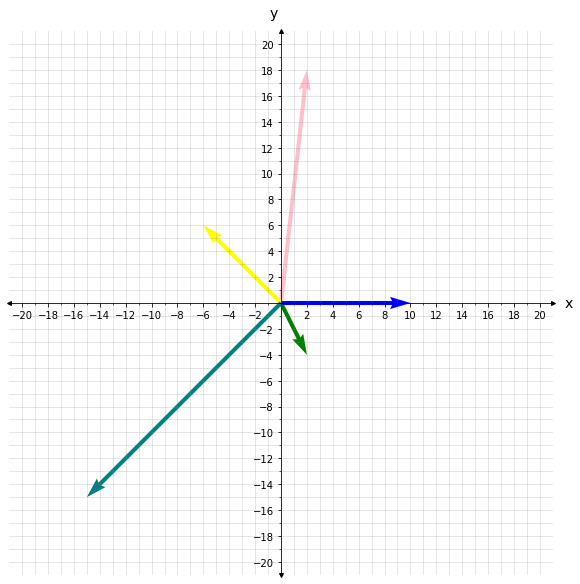

In [17]:
plot2D([],
       [(v1,'green'), (v2,'pink'), (v3,'blue'), (v4,'yellow'), (v5,'teal')],
      [-20,20], 'white')

$$||\color{green}{v_{1}}||=\sqrt{2^{2}+(-4)^{2}}=\sqrt{4+16}=\sqrt{20}$$
$$||\color{pink}{v_{2}}||=\sqrt{2^{2}+18^{2}}=\sqrt{4+324}=\sqrt{328}$$

Whatever. You get the idea. Try the rest yourself at your leisure. They're not hard. You should also practice $\textbf{normalizing}$ them. I'll do the first two:

$$\frac{1}{||\color{green}{v_{1}}||}\color{green}{v_{1}}=\frac{1}{\sqrt{20}}\begin{pmatrix}
2\\
-4
\end{pmatrix}$$

$$\frac{1}{||\color{pink}{v_{2}}||}\color{pink}{v_{2}}=\frac{1}{\sqrt{328}}\begin{pmatrix}
2\\
18
\end{pmatrix}$$

Okay, so that's great. There's another thing we need to look at. We know that $\color{maroon}{v_{9}}$ is a linear combination of our original vectors:

$$\color{maroon}{v_{9}}=\color{green}{v_{1}}+\color{pink}{v_{2}}+\color{blue}{v_{3}}+\color{yellow}{v_{4}}+\color{teal}{v_{5}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}+\begin{pmatrix}
2\\
18
\end{pmatrix}+\begin{pmatrix}
10\\
0
\end{pmatrix}+\begin{pmatrix}
-6\\
6
\end{pmatrix}+\begin{pmatrix}
-15\\
-15
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix} $$

Let's imagine I use the $1$ cofficient in front of them like so and then maneuver into a matrix-vector product:

$$(1)\begin{pmatrix}
2\\
-4
\end{pmatrix}+(1)\begin{pmatrix}
2\\
18
\end{pmatrix}+(1)\begin{pmatrix}
10\\
0
\end{pmatrix}+(1)\begin{pmatrix}
-6\\
6
\end{pmatrix}+(1)\begin{pmatrix}
-15\\
-15
\end{pmatrix}=\begin{pmatrix}
2&2&10&-6&-15\\
-4&18&0&6&-15
\end{pmatrix}\begin{pmatrix}
1\\
1\\
1\\
1\\
1
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix} $$

Wait, but we should be able to get $\color{maroon}{v_{9}}$ as the output of a different system built on our unit standard vectors:

$$(-7)\begin{pmatrix}
1\\
0
\end{pmatrix}+(5)\begin{pmatrix}
0\\
1
\end{pmatrix}=\begin{pmatrix}
1&0\\
0&1
\end{pmatrix}\begin{pmatrix}
-7\\
5
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix} $$

This should kind of be a "No, duh!" moment for you. So what gives here? Why are we dealing with this overkill? Well we don't have to. The idea here is that we can use $\color{red}{e_{1}}$ and $\color{red}{e_{2}}$ in terms of a linear combination to define $\color{maroon}{v_{9}}$. Notice:

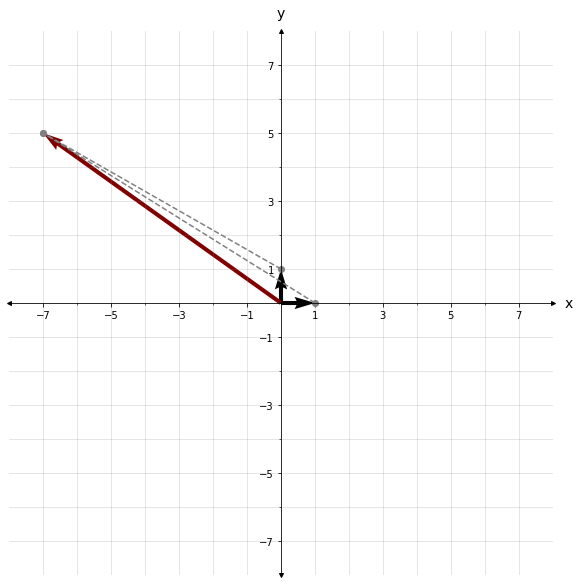

In [18]:
plot2D([(e1,v9), (e2,v9)],
       [(e1,'black'), (e2,'black'), (v9, 'maroon')],
       [-7,7], 'white')

Let's change our starting vectors slightly. Instead of using $\color{red}{e_{1}}$, let's swap in $-\color{red}{e_{2}}$ by pushing the "-" from $-7$ into the vector:

$$(7)\begin{pmatrix}
-1\\
0
\end{pmatrix}+(5)\begin{pmatrix}
0\\
1
\end{pmatrix}=\begin{pmatrix}
-1&0\\
0&1
\end{pmatrix}\begin{pmatrix}
7\\
5
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix} $$

And the graph?

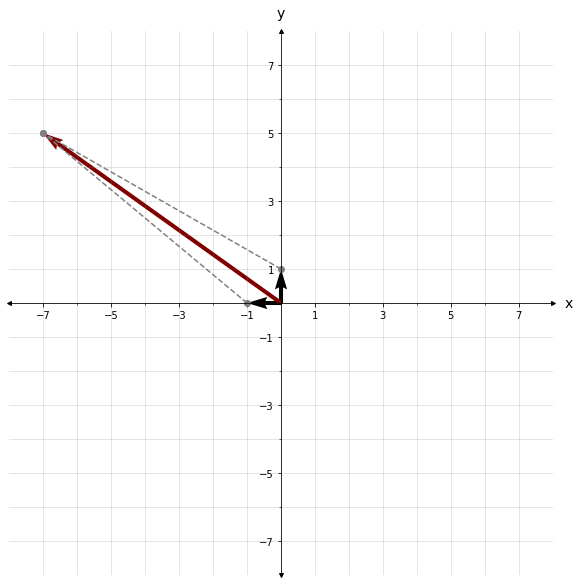

In [19]:
plot2D([(-e1,v9), (e2,v9)],
       [(-e1,'black'), (e2,'black'), (v9, 'maroon')],
       [-7,7], 'white')

This seems much nicer, but it's definitely not unique. In fact, maybe you've realized we could do:

$$(1)\begin{pmatrix}
-7\\
0
\end{pmatrix}+(1)\begin{pmatrix}
0\\
5
\end{pmatrix}=\begin{pmatrix}
-7&0\\
0&5
\end{pmatrix}\begin{pmatrix}
1\\
1
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix} $$

Okay, now we're going backwards...or are we? It seems there are a multitude of ways to get $\color{maroon}{v_{9}}$ as a linear combination of vectors in $\mathbb{R}^{2}$. In fact there are infinite. This isn't an accident though. Remember all that augmented matrix stuff? We can use that idea to find coefficient solutions for linear combinations of all our original $5$ vectors. There are exactly $10$ ways, and there is an important reason I know this which I will outline shortly. For now I'll do a few, but you should check that you can find all $10$ after I show you a few. First, a quick reminder of our originals:

$$ \color{green}{v_{1}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}\hphantom{abcedf}\color{pink}{v_{2}}=\begin{pmatrix}
2\\
18
\end{pmatrix}\hphantom{abcedf}\color{blue}{v_{3}}=\begin{pmatrix}
10\\
0
\end{pmatrix}\hphantom{abcedf}\color{yellow}{v_{4}}=\begin{pmatrix}
-6\\
6
\end{pmatrix}\hphantom{abcedf}\color{teal}{v_{5}}=\begin{pmatrix}
-15\\
-15
\end{pmatrix}$$

Take $\color{green}{v_{1}}$ and $\color{yellow}{v_{4}}$ and we'll put variables $x,y\in \mathbb{R}$ for our unknown scalars:

$$(x)\color{green}{v_{1}}+(y)\color{yellow}{v_{4}}=x\begin{pmatrix}
2\\
-4
\end{pmatrix}+y\begin{pmatrix}
-6\\
6
\end{pmatrix}=\begin{pmatrix}
2&-6\\
-4&6
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

We can do $\textbf{row reduction}$ on an $\textbf{augmented matrix}$ to find the solution as before:

In [20]:
R1, R2 = np.array([2,-6,-7]), np.array([-4,6,5])

S = np.array([R1,R2])

print('System:\n', S,'\n')

System:
 [[ 2 -6 -7]
 [-4  6  5]] 



$$\begin{pmatrix}
2&-6&\bigg|&-7\\
-4&6&\bigg|&5
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{2}+2R_{1}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
2&-6&\bigg|&-7\\
0&-6&\bigg|&-9
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} -\frac{1}{6}R_{2}\rightarrow R_{2}\text{ and }\frac{1}{2}R_{1}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&-3&\bigg|&-\frac{7}{2}\\
0&1&\bigg|&\frac{3}{2}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}+3R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&0&\bigg|&1\\
0&1&\bigg|&\frac{3}{2}
\end{pmatrix}$$

By this:

$$\color{green}{v_{1}}+\color{yellow}{\frac{3}{2}v_{4}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}+\frac{3}{2}\begin{pmatrix}
-6\\
6
\end{pmatrix}=\begin{pmatrix}
2-9\\
-4+9
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

Let's edit our system to match our steps and then plot it:

System:
 [[ 1.   0.   1. ]
 [-0.   1.   1.5]] 



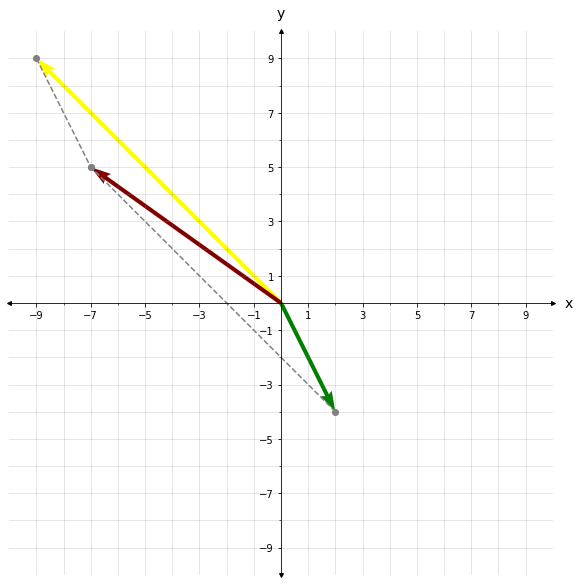

In [21]:
R1, R2 = R1, R2
R2 = R2+2*R1
R1, R2 = (1/2)*R1, -(1/6)*R2
R1 = R1+3*R2

S = np.array([R1,R2])

print('System:\n', S,'\n')

plot2D([(v1,v9), ((3/2)*v4,v9)],
       [(v1,'green'), ((3/2)*v4,'yellow'), (v9, 'maroon')],
       [-9,9], 'white')

Let's do one more and I'll leave the rest to you:

$$(x)\color{pink}{v_{2}}+(y)\color{blue}{v_{3}}=(x)\begin{pmatrix}
2\\
18
\end{pmatrix}+(y)\begin{pmatrix}
10\\
0
\end{pmatrix}=\begin{pmatrix}
2&10\\
18&0
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

In [22]:
R1, R2 = np.array([2,10,-7]), np.array([18,0,5])

S = np.array([R1,R2])

print('System:\n', S,'\n')

System:
 [[ 2 10 -7]
 [18  0  5]] 



$$\begin{pmatrix}
2&10&\bigg|&-7\\
18&0&\bigg|&5
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} \frac{1}{18}R_{2}\rightarrow R_{2}\text{ and }\frac{1}{2}R_{1}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&5&\bigg|&-\frac{7}{2}\\
1&0&\bigg|&\frac{5}{18}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&5&\bigg|&-\frac{7}{2}-\frac{5}{18}=-\frac{63+5}{18}=-\frac{68}{18}=-\frac{34}{9}\\
1&0&\bigg|&\frac{5}{18}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} \frac{1}{5}R_{1}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&-\frac{34}{45}\\
1&0&\bigg|&\frac{5}{18}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}\iff R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&0&\bigg|&\frac{5}{18}\\
0&1&\bigg|&-\frac{34}{45}
\end{pmatrix}$$


By this:

$$\color{pink}{\frac{5}{18}v_{2}}+\color{blue}{-\frac{34}{45}v_{3}}=(\frac{5}{18})\begin{pmatrix}
2\\
18
\end{pmatrix}+(-\frac{34}{45})\begin{pmatrix}
10\\
0
\end{pmatrix}=\begin{pmatrix}
\frac{5}{9}\\
5
\end{pmatrix}+\begin{pmatrix}
-\frac{68}{9}\\
0
\end{pmatrix}=\begin{pmatrix}
-\frac{63}{9}\\
5
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

Again we do our system and plot:

System:
 [[ 1.          0.          0.27777778]
 [ 0.          1.         -0.75555556]] 



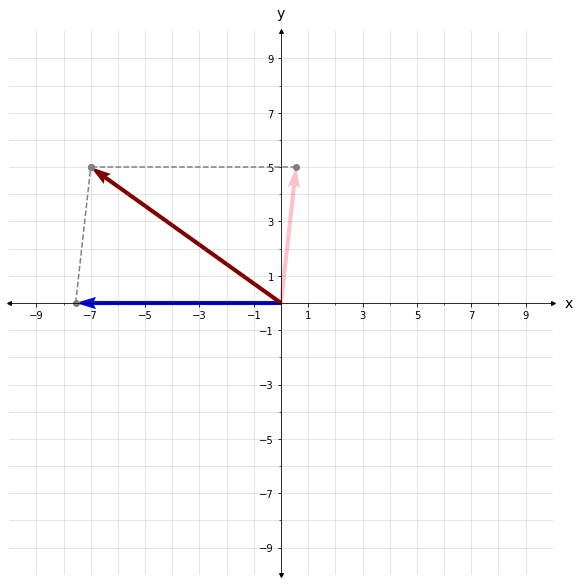

In [23]:
R1, R2 = R1, R2
R1, R2 = (1/2)*R1, (1/18)*R2
R1 = R1-R2
R1 = (1/5)*R1
T = R1
R1 = R2
R2 = T

S = np.array([R1,R2])

print('System:\n', S,'\n')

plot2D([((5/18)*v2,v9), (-(34/45)*v3,v9)],
       [((5/18)*v2,'pink'), (-(34/45)*v3,'blue'), (v9, 'maroon')],
       [-9,9], 'white')

I'm sure you can figure out the other $8$ on your own. For now I want to you think about how remarkable this idea is. A $\textbf{linear combination}$ of vectors is incredibly powerful. We can take ANY TWO VECTORS and take a linear combination of them to get our resultant vector?!?!? Hold on. Not so fast. There are infinitely vectors we can take in combination to get our final vector, true, but there are also infinitely many we can't take!

Consider:

$$\color{teal}{v_{5}}=\begin{pmatrix}
-15\\
-15
\end{pmatrix}\hphantom{abcedf}\color{goldenrod}{v_{11}}=\begin{pmatrix}
\frac{119}{20}\\
\frac{119}{20}
\end{pmatrix}$$

Let's look at these up on the big board:

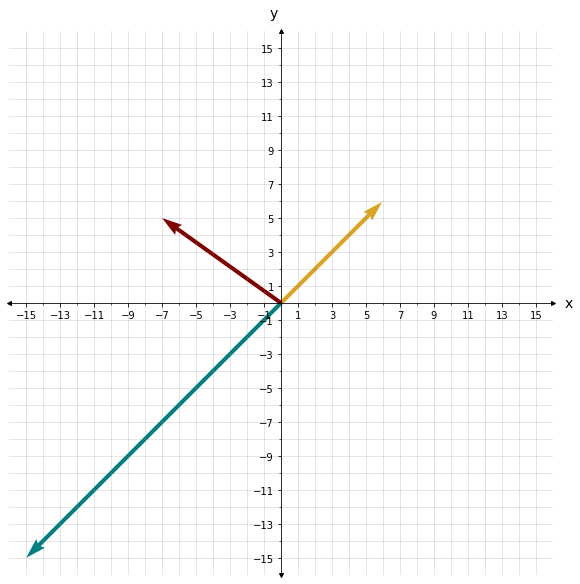

In [24]:
v11 = np.array([119/20,119/20])

plot2D([],
       [(v5,'teal'), (v11,'goldenrod'), (v9, 'maroon')],
       [-15,15], 'white')

$$(x)\color{teal}{v_{5}}+(y)\color{goldenrod}{v_{11}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{119}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{119}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

$$\begin{pmatrix}
-15&\frac{119}{20}&\bigg|&-7\\
-15&\frac{119}{20}&\bigg|&5
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&0&\bigg|&-12\\
-15&\frac{119}{20}&\bigg|&5
\end{pmatrix}$$

Uh..oh. What does it mean for $(0)x+(0)y=-12$? Well, certainly nothing good. Don't worry, we didn't screw up our math. Something else extremely important is happening here. Let's pick to random scalars for $x$ and $y$. Assume they solve our system, and we'll plug them in:

$$x=\frac{7}{13}\text{ and }y=\frac{127}{104} $$

$$\color{teal}{\frac{7}{13}v_{5}}\text{ and }\color{goldenrod}{\frac{127}{104}v_{11}}$$

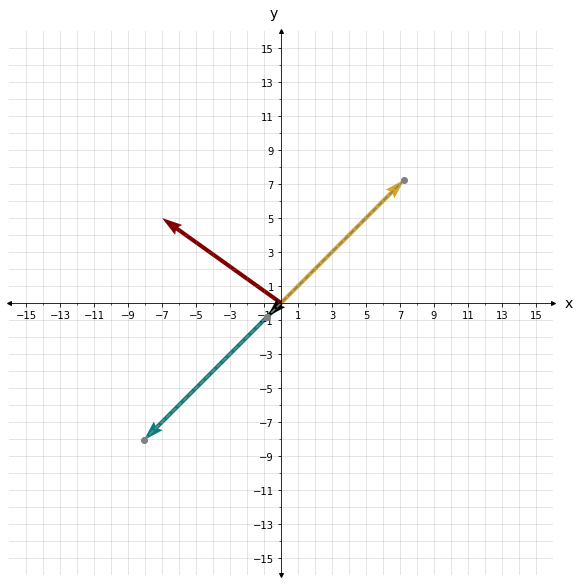

In [25]:
plot2D([((7/13)*v5,(7/13)*v5+(127/104)*v11), ((127/104)*v11,(7/13)*v5+(127/104)*v11)],
       [((7/13)*v5,'teal'), ((127/104)*v11,'goldenrod'), (v9, 'maroon'), ((7/13)*v5+(127/104)*v11,'black')],
       [-15,15], 'white')

Notice our gray parallelogram lines are stuck on the vectors even if they're slightly hard to see. We can pick another two scalars as well:

$$x=-1\text{ and }y=\frac{3}{4} $$

$$\color{teal}{-v_{5}}\text{ and }\color{goldenrod}{\frac{3}{4}v_{11}}$$

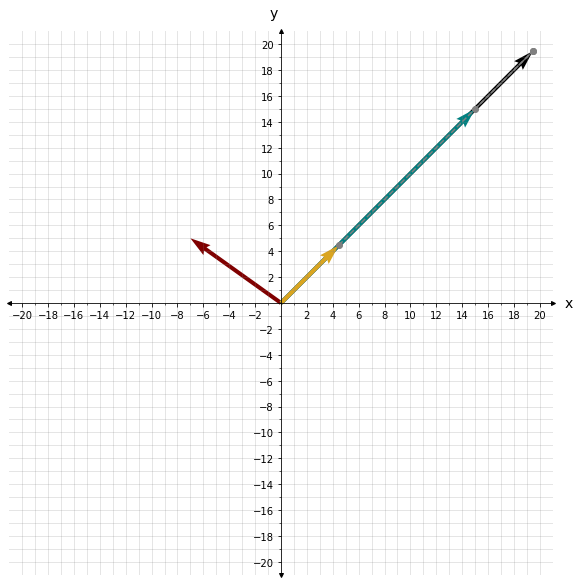

In [26]:
plot2D([(-v5,-v5+(3/4)*v11), ((3/4)*v11,-v5+(3/4)*v11)],
       [(v9, 'maroon'), (-v5+(3/4)*v11,'black'), (-v5,'teal'),((3/4)*v11,'goldenrod')],
       [-20,20], 'white')

Now we're off our vectors, but we're still trapped on the line formed by them. Basically we're stuck on:

$$\{(x,y)\in \mathbb{R}^{2}:x-y=0\}$$

Even mapping our original $\color{teal}{v_{5}}$ and $\color{goldenrod}{v_{11}}$, we see the same problem if you look closely for the gray dotted lines:

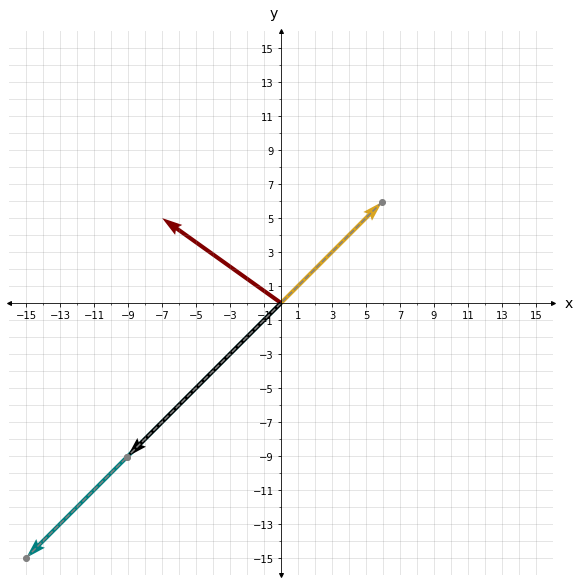

In [27]:
plot2D([(v5,v5+v11), (v11,v5+v11)],
       [(v5,'teal'), (v11,'goldenrod'), (v9, 'maroon'), (v5+v11,'black')],
       [-15,15], 'white')

We're seemingly  trapped on the line in $\mathbb{R}^{2}$ contricted by $x=y$. Even if it's just a little nudge, we need to move either of these vectors off the line. Before we nudge though, let's dig into this a little deeper. Is there a way to convince ourselves that we're trapped on this line?

Let's set up our system to have the solution of an arbitrary vector $w\in \mathbb{R}^{2}$:

$$(x)\color{teal}{v_{5}}+(y)\color{goldenrod}{v_{11}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{119}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{119}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=w=\begin{pmatrix}
w_{1}\\
w_{2}
\end{pmatrix}$$

$$\begin{pmatrix}
-15&\frac{119}{20}&\bigg|&w_{1}\\
-15&\frac{119}{20}&\bigg|&w_{2}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&0&\bigg|&w_{1}-w_{2}\\
-15&\frac{119}{20}&\bigg|&w_{2}
\end{pmatrix}$$


Ah!!!! Something interesting falls out. Look what the first equation forces into:

$$w_{1}=w_{2}$$

We're precisely forced on the line $y=x$ as we thought. The second equation:

$$-15x+\frac{119}{20}y=w_{2}$$

This is just the equation of a line that is dictated by the $x,y$ input and the scalars. The output is $w_{2}$ which forces $w_{1}$. We are definitely trapped on a line. Because $\color{teal}{v_{5}}$ and $\color{goldenrod}{v_{11}}$ fall on the same line we say they are $\textbf{linearly dependent}$. The set $\{\color{teal}{v_{5}},\color{goldenrod}{v_{11}}\}$ $\textbf{spans}$ this line because by any linear combination of this set, we can reach anywhere on the line we may want. That's a little overkill though, because either one of these vectors alone $\textbf{spans}$ this line. Thus the $\textbf{spanning set}$ of $\{(x,y)\in \mathbb{R}^{2}:x-y=0\}$ is $\{\color{teal}{v_{5}}\}$ or $\{\color{goldenrod}{v_{11}}\}$. We don't need both.

We can plot out the span underneath our vectors in black:


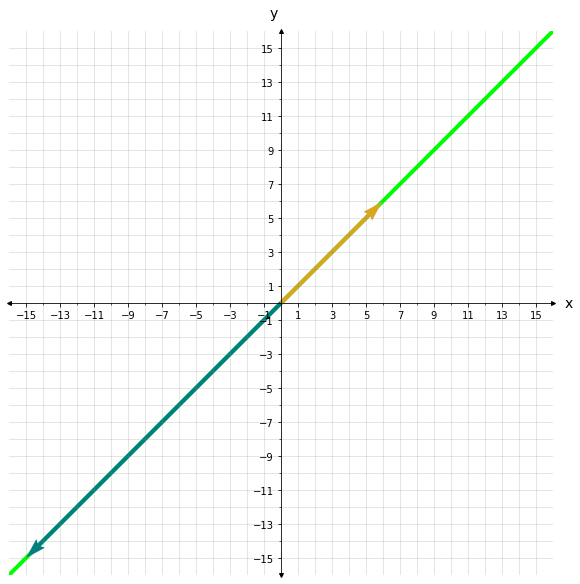

In [28]:
plot2D([],
       [(-500*v5,'lime'), (500*v5,'lime'), (v5,'teal'), (v11,'goldenrod')],
       [-15,15], 'white')

Okay, we promise we'd fix this problem, so let's fix it. Let's give $\color{goldenrod}{v_{11}}$ a little push somewhere; literally anywhere but on the same line.

$$\color{midnightblue}{v_{12}}=\begin{pmatrix}
\frac{120}{20}\\
\frac{119}{20}
\end{pmatrix}$$

Changing that $119$ to $120$ should be all it takes:

$$(x)\color{teal}{v_{5}}+(y)\color{midnightblue}{v_{11}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{120}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{120}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

$$\begin{pmatrix}
-15&\frac{120}{20}&\bigg|&-7\\
-15&\frac{119}{20}&\bigg|&5
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&\frac{1}{20}&\bigg|&-12\\
-15&\frac{119}{20}&\bigg|&5
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} 20 R_{1}\rightarrow R_{1}\text{ and }-\frac{1}{15}R_{2}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&-12\cdot 20\\
1&-\frac{119}{15\cdot20}&\bigg|&-\frac{5}{15}=-\frac{1}{3}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{2} +\frac{119}{15\cdot 20}R_{1}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&-12\cdot 20\\
1&0&\bigg|&-\frac{1}{3}-\frac{119\cdot 12\cdot 20}{15\cdot 20}=-\frac{5}{15}-\frac{119\cdot 12}{15}=-\frac{119\cdot 12+5}{15}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}\iff R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&0&\bigg|&-\frac{119\cdot 12+5}{15}\\
0&1&\bigg|&-12\cdot 20
\end{pmatrix}$$

Alright, let's check this monstrocity:

$$\color{teal}{-\frac{119\cdot 12+5}{15}v_{5}}+\color{midnightblue}{(-12\cdot 20)v_{12}}=(-\frac{119\cdot 12+5}{15})\begin{pmatrix}
-15\\
-15
\end{pmatrix}+(-12\cdot 20)\begin{pmatrix}
\frac{120}{20}\\
\frac{119}{20}
\end{pmatrix}$$

$$=(119\cdot 12+5)\begin{pmatrix}
1\\
1
\end{pmatrix}+(-12)\begin{pmatrix}
120\\
119
\end{pmatrix}=\begin{pmatrix}
119\cdot 12+5-12\cdot 120\\
119\cdot 12+5-12\cdot 119
\end{pmatrix}=\begin{pmatrix}
5+12\cdot(119-120)\\
5
\end{pmatrix}=\begin{pmatrix}
5-12\\
5
\end{pmatrix}=\begin{pmatrix}
-7\\
5
\end{pmatrix}$$

Having checked our outrageous result, let's see it's equally outrageous graph. We'll zoom out to $50$, but it will still not get to the very end of our vectors. But the $\textbf{parallelogram law}$ won't fail us. Somewhere off in the distance, the vector changes enough to give us a $\textbf{linear combination}$ of $\color{teal}{v_{5}}$ and $\color{midnightblue}{v_{12}}$ that gives us $\color{maroon}{v_{9}}$.

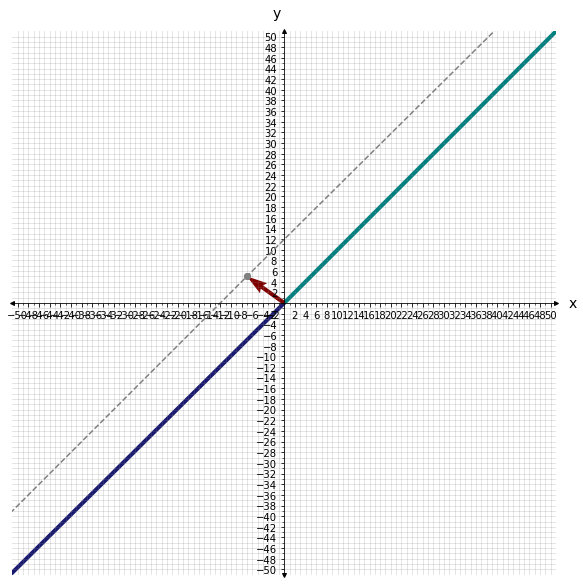

In [29]:
v12 = np.array([120/20,119/20])

plot2D([(-((119*12+5)/15)*v5,-((119*12+5)/15)*v5+-(12*20)*v12), (-(12*20)*v12,-((119*12+5)/15)*v5+-(12*20)*v12)],
       [(-((119*12+5)/15)*v5,'teal'), (-(12*20)*v12,'midnightblue'), (v9, 'maroon')],
       [-50,50], 'white')

While our $\textbf{linearly dependent}$ set from before will not supply any solutions that don't fall on that line, with just this simple adjustment we can reach any vector as a linear combination of $\color{teal}{v_{5}}$ and $\color{midnightblue}{v_{12}}$. We say that the set $\{\color{teal}{v_{5}},\color{midnightblue}{v_{12}}\}$ $\textbf{spans}$ $\mathbb{R}^{2}$.

What does this really mean? Remember being stuck to the lime grene line? Now the world is your oyster:

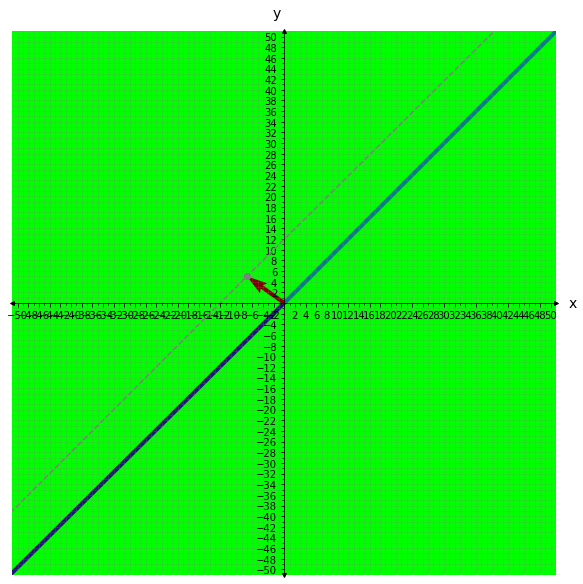

In [30]:
plot2D([(-((119*12+5)/15)*v5,-((119*12+5)/15)*v5+-(12*20)*v12), (-(12*20)*v12,-((119*12+5)/15)*v5+-(12*20)*v12)],
       [(-((119*12+5)/15)*v5,'teal'), (-(12*20)*v12,'midnightblue'), (v9, 'maroon')],
       [-50,50], 'lime')

Let's prove it! We can do this by showing that using a linear combination of these vectors we can reach any point in $\mathbb{R}^{2}$.

Let $w\in \mathbb{R}^{2\times 1}$ be an arbitrary vector. We want $x,y\in \mathbb{R}$ so that:

$$(x)\color{teal}{v_{5}}+(y)\color{midnightblue}{v_{12}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{120}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{120}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=w=\begin{pmatrix}
w_{1}\\
w_{2}
\end{pmatrix}$$

The same row reduction process as before will give us a solution for a general vector built from  $\color{teal}{v_{5}}$ and $\color{midnightblue}{v_{11}}$:

$$\begin{pmatrix}
-15&\frac{120}{20}&\bigg|&w_{1}\\
-15&\frac{119}{20}&\bigg|&w_{2}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&\frac{1}{20}&\bigg|&w_{1}-w_{2}\\
-15&\frac{119}{20}&\bigg|&w_{2}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} 20 R_{1}\rightarrow R_{1}\text{ and }-\frac{1}{15}R_{2}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&20(w_{1}-w_{2})\\
1&-\frac{119}{15\cdot20}&\bigg|&-\frac{1}{15}w_{2}
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{2} +\frac{119}{15\cdot 20}R_{1}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&20(w_{1}-w_{2})\\
1&0&\bigg|&-\frac{1}{15}w_{2}+\frac{119\cdot 20}{15\cdot 20}(w_{1}-w_{2})=-\frac{1}{15}w_{2}+\frac{119}{15}(w_{1}-w_{2})
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}\iff R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
1&0&\bigg|&\frac{119(w_{1}-w_{2})-w_{2}}{15}\\
0&1&\bigg|&20(w_{1}-w_{2})
\end{pmatrix}$$

When you plug in $w_{1}=-7$ and $w_{2}=5$ you see the same coefficients to our linear combination as before. The idea here is that that $w$ could have been ANY vector in $\mathbb{R}^{2}$. That gives us precisely what we want, but there is a shortcut to proving $\textbf{linear independence}$. Let me set $w$ to the $0$ vector. We call such systems $\textbf{homogeneous}$, which is a big word that for our purposes just means that we set all of the equations to $0$ and find that intersection. It's actually incredibly powerful as a tool:

$$(x)\color{teal}{v_{5}}+(y)\color{midnightblue}{v_{12}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{120}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{120}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=w=\begin{pmatrix}
0\\
0
\end{pmatrix}$$

$$\begin{pmatrix}
-15&\frac{120}{20}&\bigg|&0\\
-15&\frac{119}{20}&\bigg|&0
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&\frac{1}{20}&\bigg|&0\\
-15&\frac{119}{20}&\bigg|&0
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} 20 R_{1}\rightarrow R_{1}\text{ and } 20 R_{2}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&0\\
-15\cdot 20&119&\bigg|&0
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{2}-119R_{1}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&1&\bigg|&0\\
-15\cdot 20&0&\bigg|&0
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{2}-119R_{1}\rightarrow R_{2}\hphantom{abcdef} \downarrow$$

The $0$'s on the right hand side make it easy to blast away at this problem without much care. In the end we get:

$$ x=0\text{ and }(-15\cdot 20)y=0 $$

Effectively this forces $x=0$ and $y=0$ when $w$ is the $0$ vector solution.

What about when we try this $\textbf{homogeneous systems}$ trick with $\color{teal}{v_{5}}$ and $\color{goldenrod}{v_{11}}$?

$$(x)\color{teal}{v_{5}}+(y)\color{goldenrod}{v_{11}}=x\begin{pmatrix}
-15\\
-15
\end{pmatrix}+y\begin{pmatrix}
\frac{119}{20}\\
\frac{119}{20}
\end{pmatrix}=\begin{pmatrix}
-15&\frac{119}{20}\\
-15&\frac{119}{20}
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=w=\begin{pmatrix}
0\\
0
\end{pmatrix}$$

$$\begin{pmatrix}
-15&\frac{119}{20}&\bigg|&0\\
-15&\frac{119}{20}&\bigg|&0
\end{pmatrix}$$

$$\downarrow\hphantom{abcdef} R_{1}-R_{2}\rightarrow R_{1}\hphantom{abcdef} \downarrow$$

$$\begin{pmatrix}
0&0&\bigg|&0\\
-15&\frac{119}{20}&\bigg|&0
\end{pmatrix}$$

The $(0)x+(0)y=0$ is fine. The second line is as well: $15x=\frac{119}{20}y$. This of course has solutions where $x$ and $y$ aren't forced to be $0$.

The idea here is that if I start with a linearly independent set of vectors and I set the solution vector to the $0$ vector, it will force all of the variables to be $0$!!! If not, I'll get something that is dependent on $x$ and $y$ inputs. You should go through our original $5$ vectors and convince yourself that they are all mutually linearly independent with each other...or at least try a few:

$$ \color{green}{v_{1}}=\begin{pmatrix}
2\\
-4
\end{pmatrix}\hphantom{abcedf}\color{magenta}{v_{2}}=\begin{pmatrix}
2\\
18
\end{pmatrix}\hphantom{abcedf}\color{blue}{v_{3}}=\begin{pmatrix}
10\\
0
\end{pmatrix}\hphantom{abcedf}\color{yellow}{v_{4}}=\begin{pmatrix}
-6\\
6
\end{pmatrix}\hphantom{abcedf}\color{teal}{v_{5}}=\begin{pmatrix}
-15\\
-15
\end{pmatrix}$$

Okay, we've done a lot. Some of the most important things are coming up next, but we will stop here. I will say that linearly independence and linearly dependence will be joining us for the ride in a big way. Think about this idea of $\textbf{spanning set}$ of a $\textbf{vector space}$ a little more as well. A $\textbf{vector space}$ in this regard is just a place where vectors live. The space we've used in $LA3$ is just $\mathbb{R}^{2}$. There are spanning sets for $\mathbb{R}^{n}$ given any $n\in \mathbb{N}$. They will happen to coorespend with $n$ linearly independent vectors in $\mathbb{R}^{n\times 1}$, but we will talk more about that in the next lesson. Until then, enjoy a well-deserved break.

Until next time, goodnight!!!!